In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs

In [2]:
n = 10000
centres = [(0.9,0.05),(0.05,0.94)]
x,y = make_blobs(n,n_features=2,cluster_std=0.4,centers=centres,shuffle=False,random_state=42)

In [3]:
features = []
labels = []

for feature,label in zip(x,y):
    if(feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

In [7]:
X = np.array(features)
y = np.array(labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


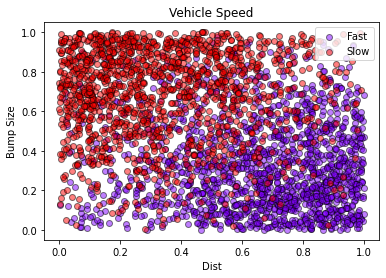

In [11]:
plt.figure()
y_unique = np.unique(y)
class_names = ['Fast','Slow']
colors = cm.rainbow(np.linspace(0.0,1.0,y_unique.size))

for this_y, color in zip(y_unique,colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:,0],this_X[:,1],c=color,alpha=0.5,edgecolors='k',label=class_names[this_y])
plt.legend(loc="best")
plt.xlabel("Dist")
plt.ylabel("Bump Size")
plt.title("Vehicle Speed")
plt.show()


In [12]:
from sklearn import linear_model

In [13]:
logreg = linear_model.LogisticRegression(C=1.0)

logreg.fit(X,y)

LogisticRegression()

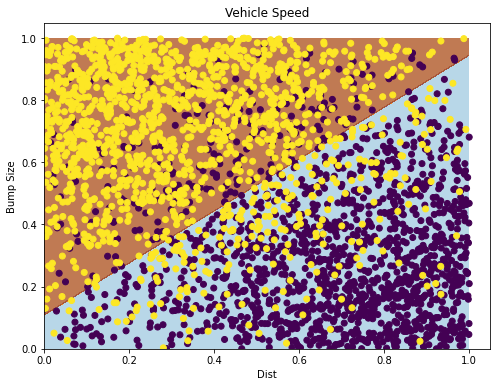

In [18]:
def predplot(clf):
    xx,yy = np.meshgrid(np.arange(0,1.0,0.001),np.arange(0,1.0,0.001))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))

    plt.xlabel("Dist")
    plt.ylabel("Bump Size")
    plt.title("Vehicle Speed")
    plt.show()

predplot(logreg)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

0.840983606557377